# Pandas Series and DataFrames

In [3]:
import pandas as pd
import numpy as np

### Reference table for this tutorial

If you get stuck on any of the following problems please reference the cell below.

In [104]:
df = pd.DataFrame([[1, np.nan, 2],
[2, 3, 5],
[np.nan, 4, 6]])

#Detect missing values
df.isna()

#Remove missing values
df.dropna(axis=0)

#Fill NA/NaN values using the specified method.
df.fillna(0)

#column/row sum
df.fillna(0).sum()


df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})

#Set the DataFrame index using existing columns.
df.set_index('month')

#Sort object by labels (along an axis).
df.sort_index()

#Reset the index, or a level of it.
df.reset_index()

#Stack the prescribed level(s) from columns to index.
df.stack()

#reversed of .stack()
df.unstack()

#Group DataFrame using a mapper or by a Series of columns.
df.groupby('month')

## Handling missing data

## Q1 Based on the given DataFrame (Canteen)
**The given DataFrame should NOT be changed after each sub-question. Change its copy instead. Namley, each sub-question will just work on a copy of the given DataFrame.**  

**Sub_Q1**: *Print the number of missing values in each column*

**Sub_Q2**: *Print the total amounts of purchases (purch_amt) excluding missing values*

**Sub_Q3**: *Print the filtered data, where any a row is dropped if more than 20 % of values are missing*

**Sub_Q4**: *Fill each missing value by propagating the last valid observation forward to the next valid (axis = 0)*

**Sub_Q5**: *Fill the `NaN` of `payment` by the mean value, the `NaN` of `student_id` by `3000.0`, and the rest missing values by `method = ffill` in one line of code*

###  the given DataFrame: Canteen
|student_id|canteen_id|payment|ord_date|rate|
|:----:|:----:|:----:|:------:|:----:|
|3002|AC1|25|2012-10-5|2|
|3001|NaN|27|2012-9-10|3|
|3001|AC1|40|NaN|5|
|3003|AC2|30|2012-8-17|NaN|
|3002|NaN|45|2012-9-10|5|
|3001|AC1|24|2012-7-27|5|
|3001|NaN|55|2012-9-10|5|
|3004|AC3|52|2012-10-10|NaN|
|3003|AC3|35|2012-10-10|3|
|3002|AC2|35|2012-6-27|2|
|3001|NaN|45|2012-8-17|5|
|3001|AC1|45|2012-4-25|NaN|
|NaN|NaN|NaN|NaN|NaN|

### Q1_solutions

In [6]:
""" Create DataFrame from Dictionary """
#Canteen = pd.DataFrame({
# 'student_id':[3002,3001,3001,3003,3002,3001,3001,3004,3003,3002,3001,3001,np.nan],
# 'canteen_id':['AC1',np.nan,'AC1','AC2',np.nan,'AC1',np.nan,'AC3','AC3','AC2',np.nan,'AC1',np.nan],
# 'payment':[25,27,40,30,45,24,55,52,35,35,45,45,np.nan],
# 'ord_date': ['2012-10-05','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27',
#             '2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25',np.nan],
# 'rate':[2,3,5,np.nan,5,5,5,np.nan,3,2,5,np.nan,np.nan]})
#Canteen.to_csv('canteen.csv', encoding='utf-8', index=False)

Canteen = pd.read_csv('canteen.csv') # If you get an error, use the code above 
#print("Original Orders DataFrame:")
Canteen

,student_id,canteen_id,payment,ord_date,rate
0,3002.0,AC1,25.0,2012-10-05,2.0
1,3001.0,NaN,27.0,2012-09-10,3.0
2,3001.0,AC1,40.0,NaN,5.0
3,3003.0,AC2,30.0,2012-08-17,NaN
4,3002.0,NaN,45.0,2012-09-10,5.0
5,3001.0,AC1,24.0,2012-07-27,5.0
6,3001.0,NaN,55.0,2012-09-10,5.0
7,3004.0,AC3,52.0,2012-10-10,NaN
8,3003.0,AC3,35.0,2012-10-10,3.0
9,3002.0,AC2,35.0,2012-06-27,2.0


#### Sub_Q1

In [13]:
""" Count the number of missing values in each column of the Test DataFrame """
print("Number of missing values of the Canteen dataframe:")
print(Canteen.isna().sum())
#--
# pandas.DataFrame.isna() is basically the same as pandas.DataFrame.isnull()

Number of missing values of the Canteen dataframe:
    student_id  canteen_id  payment  ord_date   rate
0        False       False    False     False  False
1        False        True    False     False  False
2        False       False    False      True  False
3        False       False    False     False   True
4        False        True    False     False  False
5        False       False    False     False  False
6        False        True    False     False  False
7        False       False    False     False   True
8        False       False    False     False  False
9        False       False    False     False  False
10       False        True    False     False  False
11       False       False    False     False   True
12        True        True     True      True   True
student_id    1
canteen_id    5
payment       1
ord_date      2
rate          4
dtype: int64


#### Sub_Q2

In [8]:
""" Print the total amounts of payments excluding missing values """
print("Total amounts of payments:")
print(Canteen['payment'].sum()) # skipna = True by default. Alternatively, np.nansum(Canteen['payments'])

Total amounts of payments:
458.0


#### Sub_Q3

In [14]:
""" Print the filtered data, where any a row is dropped if more than 20 % of values are missing """
# In other words, remove the row if it has less than 80 % valid values
perc = 20.0
valid_count =  int(( (100-perc) /100 )*Canteen.shape[1] ) # the number of non-null values

print("A row is dropped if more than 20 % of values are missing:")
# drop the row if the number of valid values is less than the threshold 
Canteen.dropna(axis=0,  thresh=valid_count) 

4
A row is dropped if more than 20 % of values are missing:


,student_id,canteen_id,payment,ord_date,rate
0,3002.0,AC1,25.0,2012-10-05,2.0
1,3001.0,NaN,27.0,2012-09-10,3.0
2,3001.0,AC1,40.0,NaN,5.0
3,3003.0,AC2,30.0,2012-08-17,NaN
4,3002.0,NaN,45.0,2012-09-10,5.0
5,3001.0,AC1,24.0,2012-07-27,5.0
6,3001.0,NaN,55.0,2012-09-10,5.0
7,3004.0,AC3,52.0,2012-10-10,NaN
8,3003.0,AC3,35.0,2012-10-10,3.0
9,3002.0,AC2,35.0,2012-06-27,2.0


#### Sub_Q4

In [10]:
""" Looking row by row, propagate the last valid observation forward to the next valid """
print("Propagate the last valid observation forward to the next valid:")
Canteen.fillna(axis= 0, method='ffill')

Propagate the last valid observation forward to the next valid:


,student_id,canteen_id,payment,ord_date,rate
0,3002.0,AC1,25.0,2012-10-05,2.0
1,3001.0,AC1,27.0,2012-09-10,3.0
2,3001.0,AC1,40.0,2012-09-10,5.0
3,3003.0,AC2,30.0,2012-08-17,5.0
4,3002.0,AC2,45.0,2012-09-10,5.0
5,3001.0,AC1,24.0,2012-07-27,5.0
6,3001.0,AC1,55.0,2012-09-10,5.0
7,3004.0,AC3,52.0,2012-10-10,5.0
8,3003.0,AC3,35.0,2012-10-10,3.0
9,3002.0,AC2,35.0,2012-06-27,2.0


#### Sub_Q5

In [15]:
 """*Fill the `NaN` of `payment` by the mean value, the `NaN` of `student_id` by `3000.0`, 
    and the rest missing values by `ffill` in one line of code*"""

Canteen.fillna(value = {'payment':Canteen['payment'].mean(),
                      'student_id':3000.0}).fillna(method='ffill') # can not set both method and values

,student_id,canteen_id,payment,ord_date,rate
0,3002.0,AC1,25.000000,2012-10-05,2.0
1,3001.0,AC1,27.000000,2012-09-10,3.0
2,3001.0,AC1,40.000000,2012-09-10,5.0
3,3003.0,AC2,30.000000,2012-08-17,5.0
4,3002.0,AC2,45.000000,2012-09-10,5.0
5,3001.0,AC1,24.000000,2012-07-27,5.0
6,3001.0,AC1,55.000000,2012-09-10,5.0
7,3004.0,AC3,52.000000,2012-10-10,5.0
8,3003.0,AC3,35.000000,2012-10-10,3.0
9,3002.0,AC2,35.000000,2012-06-27,2.0


## Indexing / Multi-indices / Sorting / Stacking / Data aggregation

### Q2 Based on the given DataFrame (Canteen_full)

**Sub_Q1**: *Create `Canteen_all_s1` from `Canteen_all` by building a MultiIndex from the column values of `student_id` and `canteen`*. 

**Sub_Q2**: *Create `Canteen_all_s2` by sorting all levels of indices of `Canteen_all_s1` , and see the difference between the two*

**Sub_Q3**: *Create `Canteen_all_s3` from `Canteen_all_s2` by selecting the data of June, July, August, and September*

**Sub_Q4**: *Based on `Canteen_all_s3`, which student bought the most and which canteen sold the most in terms of `payment`*

**Sub_Q5**: *Which one will raise an error and why,   
1)`Canteen_all_s2.stack().unstack()`,
or 2）`Canteen_all_s2.reset_index().stack().unstack()`*

**Sub_Q6**: *Based on `Canteen_all`,  calculate the mean, min and max values of `payment` for each `canteen_id`*

###  the DataFrame: Canteen_all
```
# Canteen_all can be just created from Canteen
Canteen_all = Canteen.dropna(how='all').fillna(axis= 0, method='ffill')
```

|student_id|canteen_id|payment|ord_date|rate|
|:----|:----|:----|:----|:----|
|3002|AC1|25|2012-10-5|2|
|3001|AC1|27|2012-9-10|3|
|3001|AC1|40|2012-9-10|5|
|3003|AC2|30|2012-8-17|5|
|3002|AC2|45|2012-9-10|5|
|3001|AC1|24|2012-7-27|5|
|3001|AC1|55|2012-9-10|5|
|3004|AC3|52|2012-10-10|5|
|3003|AC3|35|2012-10-10|3|
|3002|AC2|35|2012-6-27|2|
|3001|AC2|45|2012-8-17|5|
|3001|AC1|45|2012-4-25|5|

### Q2_solutions

In [20]:
# Canteen_all can be just created from Canteen
Canteen_all = Canteen.dropna(how='all').fillna(axis= 0, method='ffill')
Canteen_all

,student_id,canteen_id,payment,ord_date,rate
0,3002.0,AC1,25.0,2012-10-05,2.0
1,3001.0,AC1,27.0,2012-09-10,3.0
2,3001.0,AC1,40.0,2012-09-10,5.0
3,3003.0,AC2,30.0,2012-08-17,5.0
4,3002.0,AC2,45.0,2012-09-10,5.0
5,3001.0,AC1,24.0,2012-07-27,5.0
6,3001.0,AC1,55.0,2012-09-10,5.0
7,3004.0,AC3,52.0,2012-10-10,5.0
8,3003.0,AC3,35.0,2012-10-10,3.0
9,3002.0,AC2,35.0,2012-06-27,2.0


#### Sub_Q1
*Create `Canteen_all_s1` from `Canteen_all` by building a MultiIndex from the column values of `student_id` and `canteen_id`*. 

In [21]:
""" Create df_q2_s1 from df_q2 by building a MultiIndex from the 
    column values of customer_id and salesman_id.  """ 

Canteen_all_s1 = Canteen_all.set_index(['student_id', 'canteen_id'])
Canteen_all_s1

payment    ord_date  rate
student_id canteen_id                           
3002.0     AC1            25.0  2012-10-05   2.0
3001.0     AC1            27.0  2012-09-10   3.0
           AC1            40.0  2012-09-10   5.0
3003.0     AC2            30.0  2012-08-17   5.0
3002.0     AC2            45.0  2012-09-10   5.0
3001.0     AC1            24.0  2012-07-27   5.0
           AC1            55.0  2012-09-10   5.0
3004.0     AC3            52.0  2012-10-10   5.0
3003.0     AC3            35.0  2012-10-10   3.0
3002.0     AC2            35.0  2012-06-27   2.0
3001.0     AC2            45.0  2012-08-17   5.0
           AC1            45.0  2012-04-25   5.0

#### Sub_Q2
*Create `Canteen_all_s2` by sorting all levels of indices of `Canteen_all_s1` , and see the difference between the two*

In [22]:
"""Create `Canteen_all_s2` by sorting all levels of indices of `Canteen_all_s1` and 
    see the difference between the two"""
# 【sort the index values at each level】
# level : int or level name or list of ints or list of level names 
Canteen_all_s2 = Canteen_all_s1.sort_index() # by default, sort_remaining = True
Canteen_all_s2

# e.g.,Canteen_all_s1.sort_index(level = 'canteen_id')
# Canteen_all_s1.sort_index(level = 'student_id')
# Canteen_all_s1.sort_index(level = 'sdutent_id', sort_remaining = False)

payment    ord_date  rate
student_id canteen_id                           
3001.0     AC1            27.0  2012-09-10   3.0
           AC1            40.0  2012-09-10   5.0
           AC1            24.0  2012-07-27   5.0
           AC1            55.0  2012-09-10   5.0
           AC1            45.0  2012-04-25   5.0
           AC2            45.0  2012-08-17   5.0
3002.0     AC1            25.0  2012-10-05   2.0
           AC2            45.0  2012-09-10   5.0
           AC2            35.0  2012-06-27   2.0
3003.0     AC2            30.0  2012-08-17   5.0
           AC3            35.0  2012-10-10   3.0
3004.0     AC3            52.0  2012-10-10   5.0

#### Sub_Q3
*Create `Canteen_all_s3` from `Canteen_all_s2` by selecting the data of June, July, August, and September*

In [25]:
"""Create `Canteen_all_s3` from `Canteen_all_s2` by selecting the 
    data of June, July, August, and September"""

############ Solution 1 ############
# define the two dates covering days from June to September
start_date = "2012-06-01"
end_date = "2012-09-30"

# you may check each result 
after_start_date = Canteen_all_s2["ord_date"] >= start_date 
print(after_start_date)
before_end_date = Canteen_all_s2["ord_date"] <= end_date 
print(before_end_date)
between_two_dates = after_start_date & before_end_date
print(between_two_dates)

Canteen_all_s3 = Canteen_all_s2.loc[between_two_dates]
Canteen_all_s3

student_id  canteen_id
3001.0      AC1            True
            AC1            True
            AC1            True
            AC1            True
            AC1           False
            AC2            True
3002.0      AC1            True
            AC2            True
            AC2            True
3003.0      AC2            True
            AC3            True
3004.0      AC3            True
Name: ord_date, dtype: bool
student_id  canteen_id
3001.0      AC1            True
            AC1            True
            AC1            True
            AC1            True
            AC1            True
            AC2            True
3002.0      AC1           False
            AC2            True
            AC2            True
3003.0      AC2            True
            AC3           False
3004.0      AC3           False
Name: ord_date, dtype: bool
student_id  canteen_id
3001.0      AC1            True
            AC1            True
            AC1            True
           

payment    ord_date  rate
student_id canteen_id                           
3001.0     AC1            27.0  2012-09-10   3.0
           AC1            40.0  2012-09-10   5.0
           AC1            24.0  2012-07-27   5.0
           AC1            55.0  2012-09-10   5.0
           AC2            45.0  2012-08-17   5.0
3002.0     AC2            45.0  2012-09-10   5.0
           AC2            35.0  2012-06-27   2.0
3003.0     AC2            30.0  2012-08-17   5.0

In [31]:
############ Solution 2 ############
Canteen_all_s2[Canteen_all_s2["ord_date"].between("2012-06-01", "2012-09-30", inclusive='both')]

payment    ord_date  rate
student_id canteen_id                           
3001.0     AC1            27.0  2012-09-10   3.0
           AC1            40.0  2012-09-10   5.0
           AC1            24.0  2012-07-27   5.0
           AC1            55.0  2012-09-10   5.0
           AC2            45.0  2012-08-17   5.0
3002.0     AC2            45.0  2012-09-10   5.0
           AC2            35.0  2012-06-27   2.0
3003.0     AC2            30.0  2012-08-17   5.0

#### Sub_Q4
*Based on `Canteen_all_s3`, which student bought the most and which canteen sold the most in terms of `payment`*

In [32]:
"""Based on `Canteen_all_s3`, which student bought the most in terms of `payment`"""

Canteen_all_s3['payment'].sum(axis=0, level='student_id').sort_values()

student_id
3003.0     30.0
3002.0     80.0
3001.0    191.0
Name: payment, dtype: float64

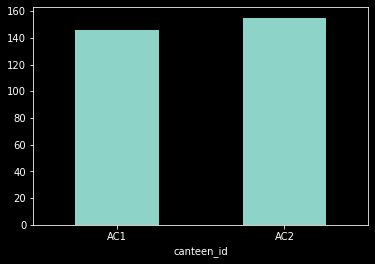

In [33]:
"""Based on `Canteen_all_s3`, which canteen sold the most in terms of `payment` """

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

Canteen_all_s3['payment'].sum(axis=0, level='canteen_id').sort_values().plot.bar(x = 'canteen_id',
                                                                             y = 'payment',
                                                                             rot = 0)


#### Sub_Q5
*Which one will raise an error and why,   
1)`Canteen_all_s2.stack().unstack()`,
or 2）`Canteen_all_s2.reset_index().stack().unstack()`*

In [36]:
"""Which one will raise an error and why 
Canteen_all_s2.stack().unstack()

"""
print(Canteen_all_s2.stack())
#Canteen_all_s2.stack().unstack()

print(Canteen_all_s2.reset_index().stack())
Canteen_all_s2.reset_index().stack().unstack()

student_id  canteen_id          
3001.0      AC1         payment             27
                        ord_date    2012-09-10
                        rate                 3
                        payment             40
                        ord_date    2012-09-10
                        rate                 5
                        payment             24
                        ord_date    2012-07-27
                        rate                 5
                        payment             55
                        ord_date    2012-09-10
                        rate                 5
                        payment             45
                        ord_date    2012-04-25
                        rate                 5
            AC2         payment             45
                        ord_date    2012-08-17
                        rate                 5
3002.0      AC1         payment             25
                        ord_date    2012-10-05
                        rat

,student_id,canteen_id,payment,ord_date,rate
0,3001,AC1,27,2012-09-10,3
1,3001,AC1,40,2012-09-10,5
2,3001,AC1,24,2012-07-27,5
3,3001,AC1,55,2012-09-10,5
4,3001,AC1,45,2012-04-25,5
5,3001,AC2,45,2012-08-17,5
6,3002,AC1,25,2012-10-05,2
7,3002,AC2,45,2012-09-10,5
8,3002,AC2,35,2012-06-27,2
9,3003,AC2,30,2012-08-17,5


#### Sub_Q6
*Based on `Canteen_all_s2`,  calculate the mean, min and max values of `payment` for each `canteen_id`*`

In [38]:
# aggregate data by several operations
#Canteen_all.groupby('canteen_id').payment.agg(['mean', 'min', 'max']) 

#-- you can even summarize other info. using describe()
Canteen_all.groupby('canteen_id').payment.describe()

,count,mean,std,min,25%,50%,75%,max
canteen_id,,,,,,,,
AC1,6.0,36.00,12.680694,24.0,25.50,33.5,43.75,55.0
AC2,4.0,38.75,7.500000,30.0,33.75,40.0,45.00,45.0
AC3,2.0,43.50,12.020815,35.0,39.25,43.5,47.75,52.0


## Additional Questions 

### Q3

#### Sub_Q1 

Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [67]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
np.random.seed(100)
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.543405
   1    0.278369
   2    0.424518
   3    0.844776
   4    0.004719
   5    0.121569
   6    0.670749
   7    0.825853
   8    0.136707
   9    0.575093
B  0    0.891322
   1    0.209202
   2    0.185328
   3    0.108377
   4    0.219697
   5    0.978624
   6    0.811683
   7    0.171941
   8    0.816225
   9    0.274074
C  0    0.431704
   1    0.940030
   2    0.817649
   3    0.336112
   4    0.175410
   5    0.372832
   6    0.005689
   7    0.252426
   8    0.795663
   9    0.015255
dtype: float64

#### Sub_Q2

Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [18]:
s.loc[:, [1, 3, 6]]

A  1    0.278369
   3    0.844776
   6    0.670749
B  1    0.209202
   3    0.108377
   6    0.811683
C  1    0.940030
   3    0.336112
   6    0.005689
dtype: float64

### Q4 

Given a DataFrame as follows:
```python
df = pd.DataFrame(np.array([[1 2],
                           [3 4]])) 
```

how do you subtract the row mean from each element in the row?

In [19]:
df = pd.DataFrame(np.array([[1, 2],
                           [3, 4]]))

df.sub(df.mean(axis=1), axis=0)

# mean(axis = 0) # Average over/along the row for each colunm, (column mean)
# mean(axis = 1) # Average over/along the colunm for each row, (row mean)
# sub(axis = 0) # subtract along the row 

# e.g., df.mean(axis=1) gives : 
# 0: 1.5 = (1 + 2 ) / 2
# 1: 3.5 = (3 + 4) / 2 

,0,1
0,-0.5,0.5
1,-0.5,0.5


### Q5

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

#### Sub_Q1
Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [20]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data = data, index= labels )
df 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### Sub_Q2
Select just the 'animal' and 'age' columns and slice the rows from 'a' to 'b' based on the DataFrame `df`.

In [21]:
df.loc['a':'b',['animal', 'age']]

############# or

# df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0


#### Sub_Q3
In the 'animal' column, change the 'snake' entries to 'python'.

In [22]:
df['animal'].replace('snake', 'python', inplace = True)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no
